In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
delivery =pd.read_csv('C:/Users/ZORO/OneDrive/Pictures/Project - 1&2_ Simple_Reg/delivery_time.csv')
delivery.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [101]:
## data cleaning process before modeling

delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [103]:
delivery.shape
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

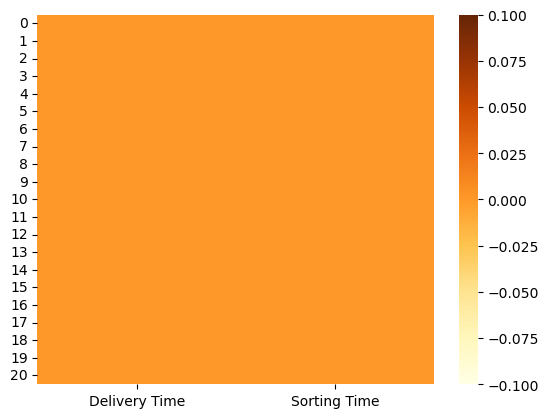

In [153]:
### exploratory data analysis on delivery data 
sns.heatmap(delivery.isnull(),cmap = 'YlOrBr')
plt.savefig('D:/heatmap.png')

In [107]:
cols =delivery.columns
cols

Index(['Delivery Time', 'Sorting Time'], dtype='object')

Col Name -  Delivery Time


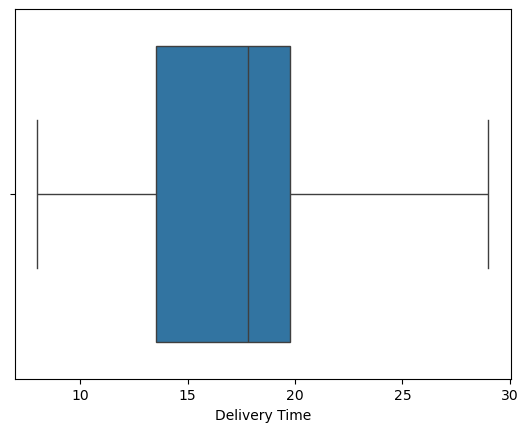

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64
Col Name -  Sorting Time


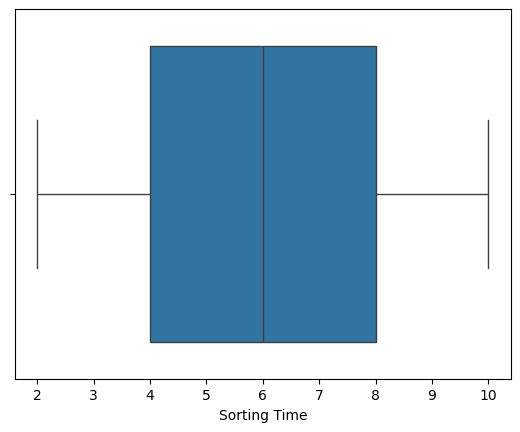

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64


In [151]:
##### Outliers - 
for i in cols:
    print("Col Name - ",i)
    sns.boxplot(x = delivery[i])
    plt.savefig('D:/boxplot.png')
    plt.show()  ###### To seperate all the plots
    print(delivery[i].describe())
    print("================================================================")

In [111]:
### modeling  of Delivery 
delivery.shape

(21, 2)

In [123]:
X =delivery['Sorting Time']
X =X.values.reshape(-1 ,1)
print(X)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [125]:
y =delivery['Delivery Time']
y =y.values.reshape(-1,1)
print(y)

[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]


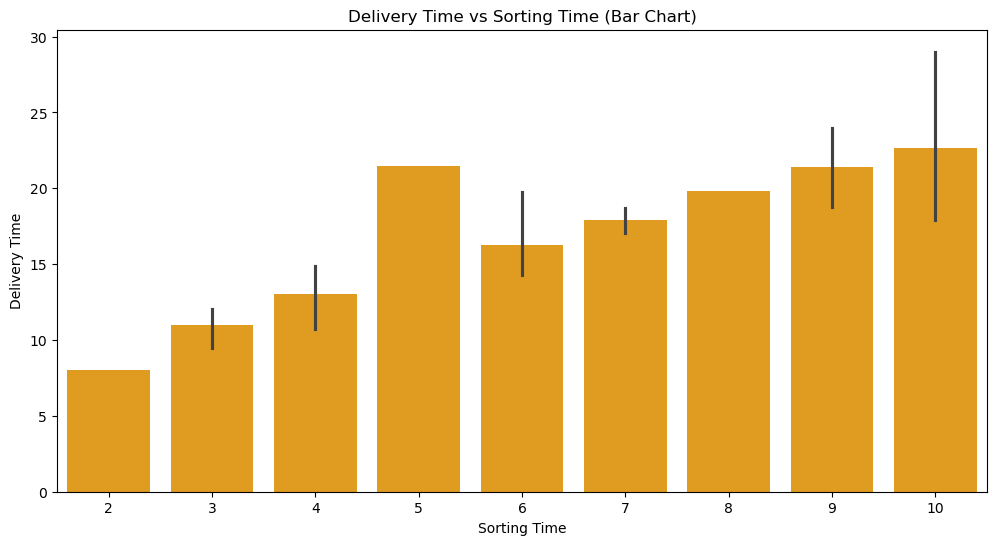

In [147]:
X =delivery['Sorting Time']
y =delivery['Delivery Time']
plt.figure(figsize=(12, 6))
sns.barplot(x=X, y=y, color='orange')
plt.title("Delivery Time vs Sorting Time (Bar Chart)")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

plt.savefig('D:/barplot.png')
plt.show()


<Figure size 640x480 with 0 Axes>

In [27]:
### model LinearRegression
from sklearn.linear_model import LinearRegression
delivery_model =LinearRegression() ## object

In [29]:
## training 
delivery_model_train =delivery_model.fit(X,y)
print( 'Delivery model Training completed')

Delivery model Training completed


In [31]:
## Rules
slope =delivery_model_train.coef_
print(f' the slope value is :{slope}')

 the slope value is :[[1.6490199]]


In [33]:
constant = delivery_model_train.intercept_
print(f'constant values is :{constant.round()}')

constant values is :[7.]


In [35]:
## accuracy of the model
r_square =delivery_model_train.score(X,y)
print(f'The r_square value is :{r_square}')

The r_square value is :0.6822714748417231


In [37]:
##prediction
y = slope*X + constant
y.round(3)

array([[23.073],
       [13.179],
       [16.477],
       [21.424],
       [23.073],
       [16.477],
       [18.126],
       [11.53 ],
       [23.073],
       [21.424],
       [19.775],
       [13.179],
       [18.126],
       [11.53 ],
       [11.53 ],
       [13.179],
       [16.477],
       [18.126],
       [ 9.881],
       [18.126],
       [14.828]])

In [39]:
 ## sampling method
delivery.shape


(21, 2)

In [41]:
##importing 
#sampling done by using sickit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [43]:
training, testing = train_test_split(delivery,test_size=0.2) 

In [45]:
training.shape,testing.shape

((16, 2), (5, 2))

In [47]:
##training
X_train =training['Sorting Time'].values.reshape(-1,1)
y_train =training['Delivery Time'].values.reshape(-1,1)

In [49]:
##testing
X_test =testing['Sorting Time'].values.reshape(-1,1)
y_test =testing['Delivery Time'].values.reshape(-1,1)

In [51]:
delivery_model_lr=LinearRegression()
##fiting for model train
delivery_model_lr_train =delivery_model_lr.fit(X_train,y_train)
print("Training compleated")

Training compleated


In [53]:
## Accuracy of training
print(f"Accuracy of the Trainig Model is : {delivery_model_lr_train.score(X_train,y_train)}")

Accuracy of the Trainig Model is : 0.7774209128079753


In [55]:
##evaluation with testing data  - passing the Input

y_pred = delivery_model_lr_train.predict(X_test)
print(f"The prediction for Delivery Time :\n {y_pred.round(3)}")


The prediction for Delivery Time :
 [[15.873]
 [13.116]
 [10.36 ]
 [14.494]
 [21.385]]


In [57]:
y_test

array([[19.75],
       [10.75],
       [ 8.  ],
       [21.5 ],
       [29.  ]])

In [59]:
## r_square value
r_square =r2_score(y_test,y_pred)
print(f"Delivery model R square value is :{r_square}")

Delivery model R square value is :0.5383684006877878


In [61]:
##rmse value
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(f"Delivery model RMSE value is : {rmse}")


Delivery model RMSE value is : 5.162586598430148


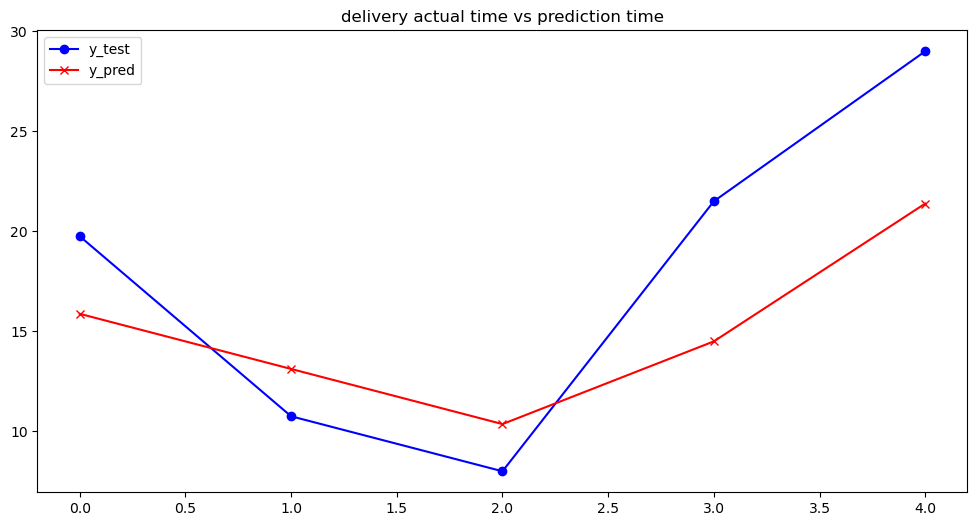

In [149]:
plt.figure(figsize = (12,6))
plt.plot(y_test, label='y_test', color='blue',marker ='o')
plt.plot(y_pred, label='y_pred', color='red',marker='x')
plt.title("delivery actual time vs prediction time")
plt.legend()
plt.savefig('D:/delivery actual time vs prediction time.png')
plt.show()